# Importação Das Bibliotecas

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

# Funções Auxiliares

In [40]:
def describe_var(dataframe,var):
    resultado_var = {}
    
    for periodo in range(17):
        aux = []
        for list in dataframe[var]:
            aux.append(list[periodo])
        resultado_var[f'{var}{periodo+1}'] = aux

    return pd.DataFrame(resultado_var)

In [41]:
def arrumaDataFrame(resultados):
    resultados_dataframe = {}
    for column in range(len(resultados.columns[:-5])):
        coluna_aux = []
        for element in range(len(resultados)):
            coluna_aux.append(np.array([float(elemento) for elemento in resultados.iloc[element,column][1:-1].split(',')]))
        
        resultados_dataframe[resultados.columns[column]] = coluna_aux


    for column in resultados.columns[4:]:
        resultados_dataframe[column] = resultados[column]


    return pd.DataFrame(resultados_dataframe)

In [42]:
def dataFrame_to_boxPlot(dataFrame,var):
    data = {}
    column_value = []
    column_x = []

    for column in range(len(dataFrame.columns)):
        column_value += list(dataFrame.iloc[:,column])
        column_x += [f'x{column+1}' for i in range(len(dataFrame))]

    data[var]=column_value
    data['x']=column_x
    return pd.DataFrame(data)

# Importação Dos Dados

In [43]:
resultados_np = pd.read_csv("C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Resultados_pi/resultados_pi_np.csv").iloc[:,1:]
resultados_ar = pd.read_csv("C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Resultados_pi/resultados_pi_ar.csv").iloc[:,1:]
resultados_treino = pd.read_csv("C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Resultados_pi/resultados_pi_treino.csv").iloc[:,1:]

In [44]:
resultados_ar.head(3)

,x,s,y,Demanda,ObjVal,ObjBound,RunTime,NodeCount,Status
0,"[178.72992068780547, 0.0, 180.71942970424018, ...","[89.54486237439593, 0.0, 90.67537169666934, 0....","[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[89.18505831340954, 89.54486237439593, 90.0440...",35979.858719,35979.858719,0.033,1.0,1
1,"[178.72992068780547, 0.0, 180.71942970424018, ...","[89.54486237439593, 0.0, 90.67537169666934, 0....","[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[89.18505831340954, 89.54486237439593, 90.0440...",35979.858719,35979.858719,0.013,1.0,1
2,"[178.72992068780547, 0.0, 180.71942970424018, ...","[89.54486237439593, 0.0, 90.67537169666934, 0....","[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[89.18505831340954, 89.54486237439593, 90.0440...",35979.858719,35979.858719,0.009,1.0,1


In [45]:
resultados_np = arrumaDataFrame(resultados_np)
resultados_ar = arrumaDataFrame(resultados_ar)
resultados_treino = arrumaDataFrame(resultados_treino)

# Análise Dos Resultados

## Análise do Resultados X

In [46]:
result_x_np = describe_var(resultados_np,'x')
result_x_ar = describe_var(resultados_ar,'x')
result_x_treino = describe_var(resultados_treino,'x')

In [47]:
boxPlot_x_np = dataFrame_to_boxPlot(result_x_np,'value')
boxPlot_x_ar = dataFrame_to_boxPlot(result_x_ar,'value')
boxPlot_x_treino = dataFrame_to_boxPlot(result_x_treino,'value')

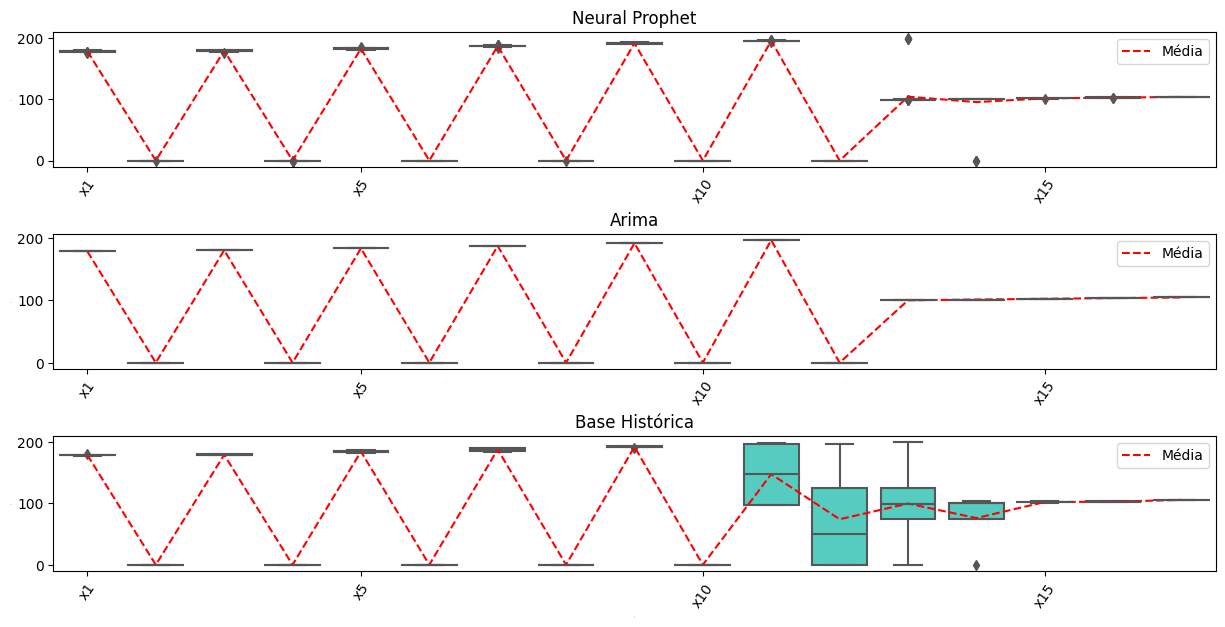

In [48]:
fig=plt.figure(figsize=(15,7))
#fig.suptitle('Distribuição da Produção por Período')



plt.subplots_adjust(wspace=0, hspace=0.5)

ax=fig.add_subplot(3,1,1)
ax.set_title('Neural Prophet')
sns.boxplot(data=boxPlot_x_np,x='x',y='value',color='turquoise')
plt.plot(result_x_np.columns,result_x_np.describe().iloc[1,:],color='red',linestyle='--',label='Média')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
plt.xticks([0]+[i*5-1 for i in range(1,int(len(result_x_np.columns)/5)+1)])
plt.legend()


ax=fig.add_subplot(3,1,2)
ax.set_title('Arima')
sns.boxplot(data=boxPlot_x_ar,x='x',y='value',color='turquoise')
plt.plot(result_x_ar.columns,result_x_ar.describe().iloc[1,:],color='red',linestyle='--',label='Média')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
plt.xticks([0]+[i*5-1 for i in range(1,int(len(result_x_ar.columns)/5)+1)])
plt.legend()


ax=fig.add_subplot(3,1,3)
ax.set_title('Base Histórica')
sns.boxplot(data=boxPlot_x_treino,x='x',y='value',color='turquoise')
plt.plot(result_x_treino.columns,result_x_treino.describe().iloc[1,:],color='red',linestyle='--',label='Média')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
plt.xticks([0]+[i*5-1 for i in range(1,int(len(result_x_treino.columns)/5)+1)])
plt.legend()

plt.savefig('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/img/ResultX.png', format='png', bbox_inches='tight',pad_inches = 0.1)

In [68]:
boxPlot_x_treino['year'] = [2015+j for i in range(17) for j in range(4)]

In [69]:
boxPlot_x_treino

,value,x,year
0,178.0,x1,2015
1,177.0,x1,2016
2,178.0,x1,2017
3,180.0,x1,2018
4,0.0,x2,2015
...,...,...,...
63,102.0,x16,2018
64,105.0,x17,2015
65,105.0,x17,2016
66,106.0,x17,2017


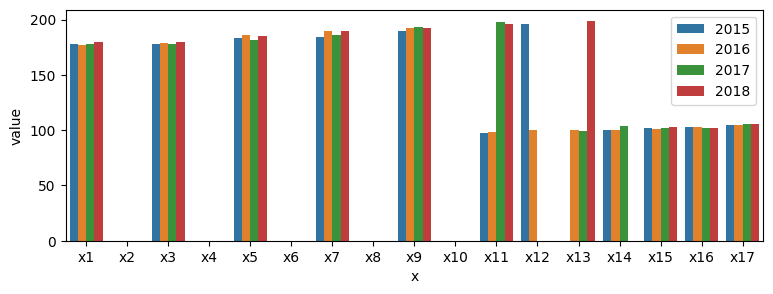

In [74]:
fig=plt.figure(figsize=(9,3))

sns.barplot(data=boxPlot_x_treino, x="x", y="value", hue="year")

plt.legend()
plt.savefig('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/img/ResultX1-17.png', format='png', bbox_inches='tight',pad_inches = 0.1)

In [51]:
resultados_treino['ObjBound']

0    37926.0
1    35946.0
2    35870.0
3    35982.0
Name: ObjBound, dtype: float64

In [52]:
result_s_np = describe_var(resultados_np,'s')
result_s_ar = describe_var(resultados_ar,'s')
result_s_treino = describe_var(resultados_treino,'s')

boxPlot_s_np = dataFrame_to_boxPlot(result_s_np,'value')
boxPlot_s_ar = dataFrame_to_boxPlot(result_s_ar,'value')
boxPlot_s_treino = dataFrame_to_boxPlot(result_s_treino,'value')

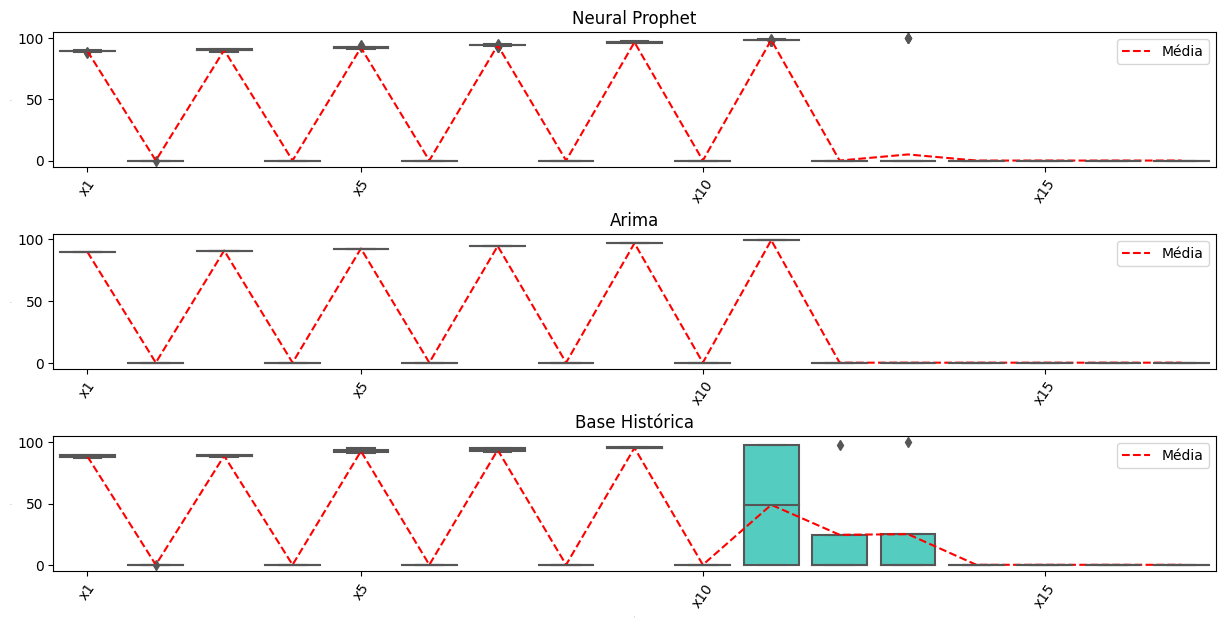

In [53]:
fig=plt.figure(figsize=(15,7))
#fig.suptitle('Distribuição do Estoque por Período')



plt.subplots_adjust(wspace=0, hspace=0.5)

ax=fig.add_subplot(3,1,1)
ax.set_title('Neural Prophet')
sns.boxplot(data=boxPlot_s_np,x='x',y='value',color='turquoise')
plt.plot(result_s_np.columns,result_s_np.describe().iloc[1,:],color='red',linestyle='--',label='Média')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
plt.xticks([0]+[i*5-1 for i in range(1,int(len(result_s_np.columns)/5)+1)])
plt.legend()


ax=fig.add_subplot(3,1,2)
ax.set_title('Arima')
sns.boxplot(data=boxPlot_s_ar,x='x',y='value',color='turquoise')
plt.plot(result_s_ar.columns,result_s_ar.describe().iloc[1,:],color='red',linestyle='--',label='Média')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
plt.xticks([0]+[i*5-1 for i in range(1,int(len(result_s_ar.columns)/5)+1)])
plt.legend()


ax=fig.add_subplot(3,1,3)
ax.set_title('Base Histórica')
sns.boxplot(data=boxPlot_s_treino,x='x',y='value',color='turquoise')
plt.plot(result_s_treino.columns,result_s_treino.describe().iloc[1,:],color='red',linestyle='--',label='Média')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
plt.xticks([0]+[i*5-1 for i in range(1,int(len(result_s_treino.columns)/5)+1)])
plt.legend()
plt.savefig('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/img/ResultS.png', format='png', bbox_inches='tight',pad_inches = 0.1)

## Análise do Resultados RunTime

In [54]:
df_RunTime = pd.DataFrame({'RunTime':list(resultados_np['RunTime'].values)+list(resultados_ar['RunTime'].values)+list(resultados_treino['RunTime'].values),
                           'Alg': ['Neural Prophet' for i in range(len(resultados_np))]+['Arima' for i in range(len(resultados_ar))]+['Demandas Passadas' for i in range(len(resultados_treino))]
                         })

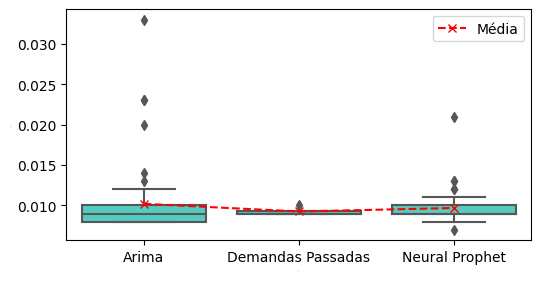

In [55]:
fig=plt.figure(figsize=(6,3))
#fig.suptitle('Distribuição dos Valores RunTime')

sns.boxplot(df_RunTime.sort_values('Alg'), x='Alg',y='RunTime',color='turquoise')
plt.plot(df_RunTime.groupby('Alg').mean().sort_index(),color='red',marker='x',linestyle='--',label='Média')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
plt.legend()

plt.plot()
plt.savefig('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/img/ResulRunTime.png', format='png', bbox_inches='tight',pad_inches = 0.1)

## Análise do Resultados OBbjBound/ OBbjVal

In [56]:
df_objVal = pd.DataFrame({'ObjVal':list(resultados_np['ObjVal'].values)+list(resultados_ar['ObjVal'].values)+list(resultados_treino['ObjVal'].values),
             'Alg': ['Neural Prophet' for i in range(len(resultados_np))]+['Arima' for i in range(len(resultados_ar))]+['Custos Históricos' for i in range(len(resultados_treino))]
             })

In [57]:
df_ObjBound = pd.DataFrame({'ObjBound':list(resultados_np['ObjBound'].values)+list(resultados_ar['ObjBound'].values)+list(resultados_treino['ObjBound'].values),
             'Alg': ['Neural Prophet' for i in range(len(resultados_np))]+['Arima' for i in range(len(resultados_ar))]+['Custos Históricos' for i in range(len(resultados_treino))]
             })

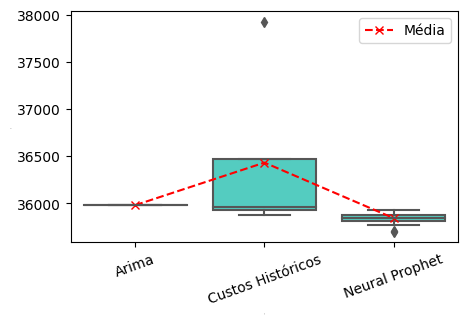

In [58]:
fig=plt.figure(figsize=(5,3))
#plt.subplots_adjust(wspace=0.3, hspace=0)

'''
ax=fig.add_subplot(1,2,1)
ax.set_title('Distribuição dos Valores ObjBound')
sns.boxplot(df_ObjBound.sort_values('Alg'), x='Alg',y='ObjBound',color='turquoise')
plt.plot(df_ObjBound.groupby('Alg').mean().sort_index(),color='red',marker='x',linestyle='--',label='Média')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
plt.legend()
for tick in ax.get_xticklabels():
    tick.set_rotation(20)
'''

ax=fig.add_subplot(1,1,1)
#ax.set_title('Distribuição dos Valores ObjVal')
sns.boxplot(df_objVal.sort_values('Alg'), x='Alg',y='ObjVal',color='turquoise')
plt.plot(df_objVal.groupby('Alg').mean().sort_index(),color='red',marker='x',linestyle='--',label='Média')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
plt.legend()
for tick in ax.get_xticklabels():
    tick.set_rotation(20)

plt.savefig('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/img/ObjValBound.png', format='png', bbox_inches='tight',pad_inches = 0.1)